In [4]:
import torch as t
from torch import nn as nn
from torch.nn import functional as F
import numpy as np

In [5]:
value = np.random.rand(5, 10)
value = t.Tensor(value)
x = value + 2
linear = nn.Linear(10, 1)
out = linear(x)
out = F.sigmoid(out)

/usr/lib/python3.7/site-packages/torch/nn/functional.py:1397: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
value

tensor([[0.7605, 0.1396, 0.2181, 0.5737, 0.2133, 0.5425, 0.5313, 0.6571, 0.3289,
         0.1304],
        [0.9112, 0.0353, 0.3413, 0.5058, 0.1164, 0.5609, 0.7369, 0.8144, 0.4303,
         0.9174],
        [0.1025, 0.3142, 0.3064, 0.9592, 0.9474, 0.0839, 0.4320, 0.5806, 0.1276,
         0.9723],
        [0.3596, 0.7746, 0.7115, 0.7115, 0.8318, 0.6591, 0.4013, 0.1044, 0.0361,
         0.8392],
        [0.6259, 0.5572, 0.9843, 0.9724, 0.1654, 0.8150, 0.5574, 0.7373, 0.8955,
         0.9455]])

In [8]:
linear

Linear(in_features=10, out_features=1, bias=True)

In [9]:
out

tensor([[0.7020],
        [0.7406],
        [0.7850],
        [0.7374],
        [0.7459]], grad_fn=<SigmoidBackward>)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 10)
        self.pool = nn.MaxPool2d(2, 2)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.log_softmax(self.fc1(x), dim=-1)
        return x
model = Net()

In [11]:
model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [12]:
import matplotlib.pyplot as plt # shift-enter
# https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py

In [13]:
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

In [14]:
# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2


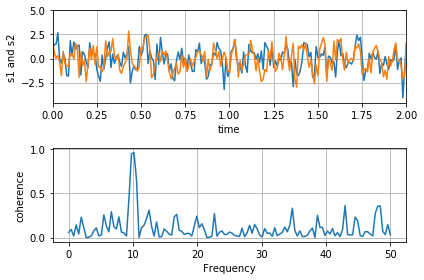

In [17]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)
cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()